# 분산 분석

선형회귀분석의 결과가 얼마나 좋은지는 단순히 잔차제곱합(RSS: Residula Sum of Square)으로 평가할 수 없다. 변수의 단위 즉, 스케일이 달라지면 회귀분석과 상관없이 잔차제곱합도 달라지기 때문이다.

분산 분석(ANOVA: Analysis of Variance)은 종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법이다. 분산 분석은 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용할 수 있으며 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데도 사용된다.

## 분산

$\bar{y}$를 종속 변수 $y$의 샘플 평균이라고 하자.

$$\bar{y}=\frac{1}{N}\sum_{i=1}^N y_i $$

종속 변수의 분산(샘플의 갯수로 나누지 않았으므로 정확하게는 분산이 아니지만 여기에서는 분산이라는 용어를 사용하자)을 나타내는 TSS(total sum of square)라는 값을 정의한다.

$$\text{TSS} = \sum_i (y_i-\bar{y})^2 = (y - \bar{y})^T(y - \bar{y} )$$

**TSS는 종속변수값의 움직임의 범위**를 나타낸다.


마찬가지로 회귀 분석에 의해 예측한 종속 변수의 분산을 나타내는 ESS(explained sum of squares),

$$\text{ESS}=\sum_i (\hat{y}_i -\bar{\hat{y}})^2 = (\hat{y} - \bar{\hat{y}})^T(\hat{y} - \bar{\hat{y}})$$

오차의 분산을 나타내는 RSS(residual sum of squares)도 정의할 수 있다.

$$\text{RSS}=\sum_i (y_i - \hat{y}_i)^2\ = e^Te$$

위 식에서 $\bar{\hat{y}}$는 모형 예측값의 평균이다.

또한 **ESS는 모형에서 나온 예측값의 움직임의 범위**, **RSS는 잔차의 움직임의 범위, 즉 오차의 크기**를 뜻한다고 볼 수 있다.

만약 회귀모형이 올바르게 정의되었다면 잔차의 평균이 0이 된다. 즉, 종속변수의 평균과 모형 예측값의 평균이 같아진다.

$$ \bar{e} = \bar{y} - \bar{\hat{y}} = 0$$

$$ \bar{y} = \bar{\hat{y}} $$

그리고 이 분산값들 간에는 다음과 같은 관계가 성립한다. 

$$\text{TSS} = \text{ESS} + \text{RSS}$$

이는 다음과 같이 증명할 수 있다.

우선 회귀 분석으로 구한 가중치 벡터를 $\hat{w}$, 독립 변수(설명 변수) $x$에 의한 종속 변수의 추정값을 $\hat{y}$, 잔차를 $e$ 라고 하면 다음 식이 성립한다.

$$ y = X\hat{w} + e = \hat{y} + e $$

따라서

$$
y - \bar{y} = \hat{y} - \bar{y} + e = (X- \bar{X})\hat{w} + e
$$

여기에서 $\bar{X}$는 각 행의 값이 $X$의 해당 행의 값들의 평균인 행렬이다.


이 식에 나온 $X,\bar{X}$와 잔차 $e$는 다음과 같은 직교 관계가 성립한다. 

$$ X^Te = \bar{X}^Te = 0 $$

이 식들을 정리하면 다음과 같다.


$$
\begin{eqnarray}
\text{TSS} 
&=& (y - \bar{y})^T(y - \bar{y} ) \\
&=& (\hat{y} - \bar{y} + e)^T(\hat{y} - \bar{y} + e) \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te + 2(\hat{y} - \bar{y})^Te \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te + 2\hat{w}^T(X - \bar{X})^Te \\
&=& (\hat{y} - \bar{y})^T(\hat{y} - \bar{y}) + e^Te \\
&=& \text{ESS} + \text{RSS}
\end{eqnarray}
$$


위 식이 말하는 바는 다음과 같다.

> 모형 예측치의 움직임의 크기(분산)은 종속변수의 움직임의 크기(분산)보다 클 수 없다.

> 모형의 성능이 좋을수록 모형 예측치의 움직임의 크기는 종속변수의 움직임의 크기와 비슷해진다.

간단한 1차원 데이터와 모형을 사용하여 이 식이 성립하는지 살펴보자.

In [19]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()

`RegressionResult` 타입 객체는 다음과 같이 분산분석과 관련된 속성값을 가진다.

In [20]:
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.757898
ESS =  188589.613492
RSS =  102754.337551
ESS + RSS =  291343.951043
R squared =  0.647309178092


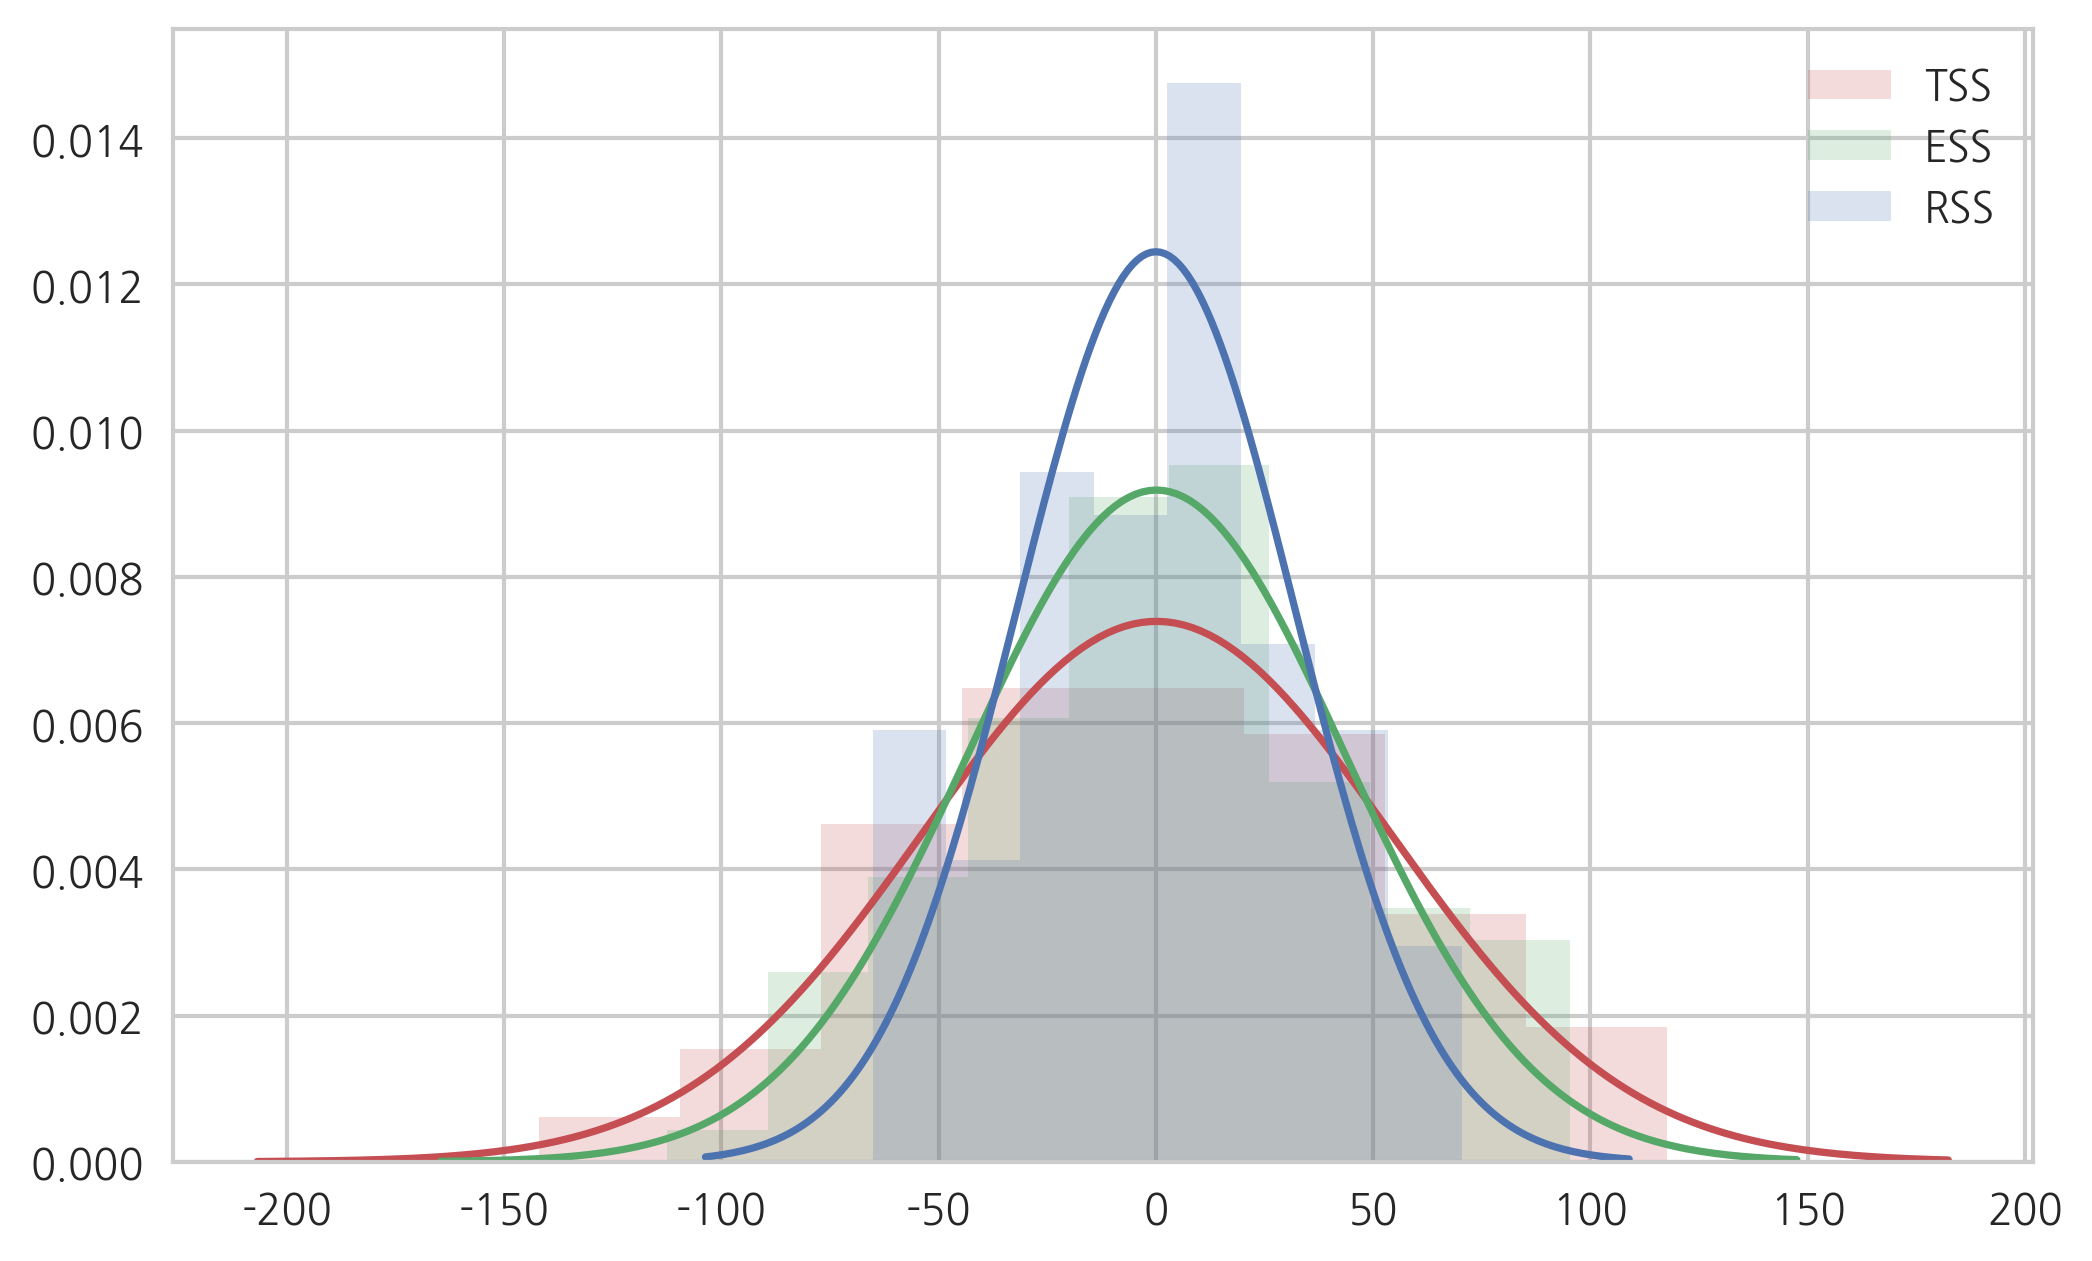

In [21]:
sns.distplot(y, 
             kde=False, fit=sp.stats.norm, hist_kws={"color": "r", "alpha": 0.2}, fit_kws={"color": "r"}, 
             label="TSS")
sns.distplot(result.fittedvalues, 
             kde=False, hist_kws={"color": "g", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "g"}, 
             label="ESS")
sns.distplot(result.resid, 
             kde=False, hist_kws={"color": "b", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "b"}, 
             label="RSS")
plt.legend()
plt.show()

## 결정계수(Coefficient of Determination)

위의 분산 관계식에서 모형의 성능을 나타내는 결정계수(Coefficient of Determination) $R^2$를 정의할 수 있다.

$$R^2 \equiv 1 - \dfrac{\text{RSS}}{\text{TSS}}\ = \dfrac{\text{ESS}}{\text{TSS}}\ $$

분산 관계식과 모든 분산값이 0보다 크다는 점을 이용하면 $R^2$의 값은 다음과 같은 조건을 만족함을 알 수 있다.

$$0 \leq R^2  \leq 1$$

여기에서 $R^2$가 0이라는 것은 오차의 분산 RSS가 최대이고 회귀분석 예측값의 분산 ESS가 0인 경우이므로 회귀분석 결과가 아무런 의미가 없다는 뜻이다.
반대로 $R^2$가 1이라는 것은 오차의 분산 RSS가 0이고 회귀분석 예측의 분산 ESS가 TSS와 같은 경우이므로 회귀분석 결과가 완벽하다는 뜻이다.
따라서 결정계수값은 회귀분석의 성능을 나타내는 수치라고 할 수 있다.

## 분산 분석표

분산 분석의 결과는 보통 다음과 같은 분산 분석표를 사용하여 표시한다. 아래의 표에서 $N$은 데이터의 갯수, $K$는 모수의 갯수를 뜻한다.


| source | degree of freedom | sum of square | mean square  | F test-statstics | p-value |
|-|-|-|-|-|-|
| Regression| $$K-1$$ | $$\text{ESS}$$ | $$s_{\hat{y}}^2 = \dfrac{\text{ESS}}{K-1}$$   | $$F=\dfrac{s_{\hat{y}}^2}{s_e^2} $$ | p-value |
| Residual | $$N-K$$  | $$\text{RSS}$$  | $$s_e^2= \dfrac{\text{RSS}}{N-K}$$ | |
| Total     | $$N-1$$  | $$\text{TSS}$$ | $$s_y^2= \dfrac{\text{TSS}}{N-1}$$ | |
| $R^2$   |    |  $$\text{ESS} / \text{TSS}$$ |  | |


## 회귀 분석 F-검정과 분산 분석의 관계

이러한 모양의 표를 사용하는 이유는 분산 분석의 결과를 이용하여 회귀 분석 F-검정에 필요한 검정통계량을 구할 수 있기 때문이다. 

회귀 분석 F-검정의 원래 귀무 가설은 모든 계수 $w_i$가 $0$ 이라는 것이지만 이 때는 모형이 아무런 의미가 없으므로 결정계수 값도 0이 된다 

$$ H_0: R^2 = 0 $$

이 때 다음 수식의 결과는 F 분포를 따른다. 따라서 이 값을 회귀 분석 F-검정의 검정통계량으로 사용할 수 있다.

$$ \dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} = \dfrac{R^2/(K-1)}{(1-R^2)/(N-K)} \sim F(K-1, N-K) $$

statsmodels 에서는 다음과 같이 `anova_lm` 명령을 사용하여 분산 분석표를 출력할 수 있다. 다만 이 명령을 사용하기 위해서는 모형을 `from_formula` 메서드로 생성하여야 한다.

`anova_lm` 명령으로 구한 F 검정통계량과 유의확률은 모형 `summary` 명령으로 구한 `F-statistic` 및 `Prob (F-statistic)`과 일치한다.

In [22]:
sm.stats.anova_lm(result)

/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


In [23]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Thu, 08 Mar 2018   Prob (F-statistic):           6.60e-24
Time:                        19:39:19   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

## 상수항이 없는 모형의 경우

모형에서 상수항을 지정하지 않은 경우에는 결정계수의 정의에 사용되는 TSS의 정의가 다음과 같이 달라진다.

$$\text{TSS} = \sum_i y_i^2 = y^Ty $$

즉, 실제 샘플평균과 상관없이 $\bar{y} = $이라는 가정하에 TSS를 계산한다. 이렇게 정의하지 않으면 TSS = RSS + ESS 관계식이 성립하지 않아서 결정계수의 값이 1보다 커지게 된다.

따라서 모형의 결정계수를 비교할 때 **상수항이 없는 모형과 상수항이 있는 모형은 직접 비교하면 안된다.**

In [24]:
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, bias=100, coef=True, random_state=0)
dfX = pd.DataFrame(X0, columns=["X"])
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model2 = sm.OLS.from_formula("Y ~ X + 0", data=df)
result2 = model2.fit()

In [25]:
result2.rsquared

0.18768724705943929

## F 검정을 이용한 모형 비교

F 검정을 이용하면 다음과 같이 포함관계(nesting)에 있는 두 모형의 성능을 비교할 수 있다. 

* Full Model: $$ y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 $$
* Reduced Model: $$ y = w_0 + w_1 x_1 $$


다음과 같은 귀무 가설을 검정하는 것은 위의 두 모형이 실질적으로 같은 모형이라는 가설을 검장하는 것과 같다.

$$ H_0: w_2 = w_3 = 0 $$

이 검정도 F 검정을 사용하여 할 수 있다. StatsModels에서는 `anova_lm` 명령에 두 모형의 result 객체를 인수로 넣어주면 이러한 검정을 할 수 있다. 인수를 넣어줄 때는 reduced model, full model의 순서로 넣어준다.

In [26]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [28]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,492.0,11080.276284,0.0,NaN,NaN,NaN
1,494.0,11082.941389,-2.0,-2.665105,0.059396,NaN


## F 검정을 사용한 변수 중요도 비교

F 검정은 각 독립변수의 중요도를 비교하기 위해 사용할 수 있다. 
방법은 전체 모형과 각 변수 하나만을 뺀 모형들의 성능을 비교하는 것이다. 이는 간접적으로 각 독립 변수의 영향력을 측정하는 것과 같다.

`anova_lm` 명령에서는 `typ=2`로 지정하여 각 모형에서의 F 검정을 계산할 수 있다.

In [10]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11080.276284,1.0,241.727993,10.733502,0.001126


In [11]:
model_boston = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,241.727993,1.0,10.733502,1.126402e-03
ZN,257.226157,1.0,11.421671,7.836070e-04
INDUS,2.591314,1.0,0.115063,7.345971e-01
NOX,488.605951,1.0,21.695680,4.117296e-06
RM,1865.902935,1.0,82.852108,2.207486e-18
AGE,0.072792,1.0,0.003232,9.546859e-01
DIS,1232.544417,1.0,54.728947,6.017651e-13
RAD,478.172457,1.0,21.232399,5.189664e-06
TAX,242.053549,1.0,10.747958,1.117826e-03
PTRATIO,1195.939414,1.0,53.103567,1.268218e-12


이 값은 단일 계수 t 검정의 유의확률과 동일하다. 그 이유는 다음과 같은 t 분포와 F 분포의 동치 성질 때문이다.

$$ t_n^2 = F_{(1, n)} $$

## 분산 분석을 이용한 카테고리 값의 영향 분석

앞에서 보았듯이 카테고리 변수는 클래스 갯수과 같은 갯수의 더미 변수로 변환된다. 따라서 더미 변수에 대해 분산 분석을 하면 각 클래스가 가지는 영향력을 계산하는 것과 같다. 

이 경우에는 분산 분석에 사용되는 각 분산의 의미가 다음과 같다. 다음은 $K$개의 복수의 카테고리 값을 가지는 경우이다.

$\bar{y}_k$은 클래스 $k$의 종속 변수의 값의 평균으로 카테고리 값만을 유일한 독립 변수로 가지는 모형의 경우 이 값은 예측치 $\hat{y}$과 같다.

* ESS: 각 그룹 평균의 분산 (Between-Group Variance) 
  $$ BSS = \sum_{k=1}^K (\bar{y}_k - \bar{y})^2 $$

* RSS: 각 그룹 내의 오차의 분산의 합 (Within-Group Variance)
  $$ WSS = \sum_{i}^N (\bar{y}_k - y_{i})^2 $$

* TSS : 전체 오차의 분산
  $$ TSS = \sum_{i}^N (y_{i} - \bar{y})^2 $$

| source | degree of freedom | sum of square | mean square  | F test-statstics | p-value |
|-|-|-|-|-|-|
| Between  | $$K-1$$ | $$\text{BSS}$$ | $$s_{\hat{y}}^2 = \dfrac{\text{ESS}}{K-1}$$   | $$F=\dfrac{s_{\hat{y}}^2}{s_e^2} $$ | p-value |
| Within   | $$N-K$$  | $$\text{WSS}$$  | $$s_e^2= \dfrac{\text{RSS}}{N-K}$$ | |
| Total     | $$N-1$$  | $$\text{TSS}$$ | $$s_y^2= \dfrac{\text{TSS}}{N-1}$$ | |
| $R^2$   |    |  $$\text{BSS} / \text{TSS}$$ |  | |

이 때 F-검정의 귀무가설은 모든 더미 변수에 대한 계수가 0인 경우, 즉 클래스 구별에 따른 그룹간 분산 변화가 없는 경우이다.
즉 $\text{BSS}=0$이고 $\text{WSS}=\text{TSS}$ 이다.

보스턴 집값 자료에서 변수 `CHAS`의 영향을 분산 분석으로 알아보면 다음과 같다.

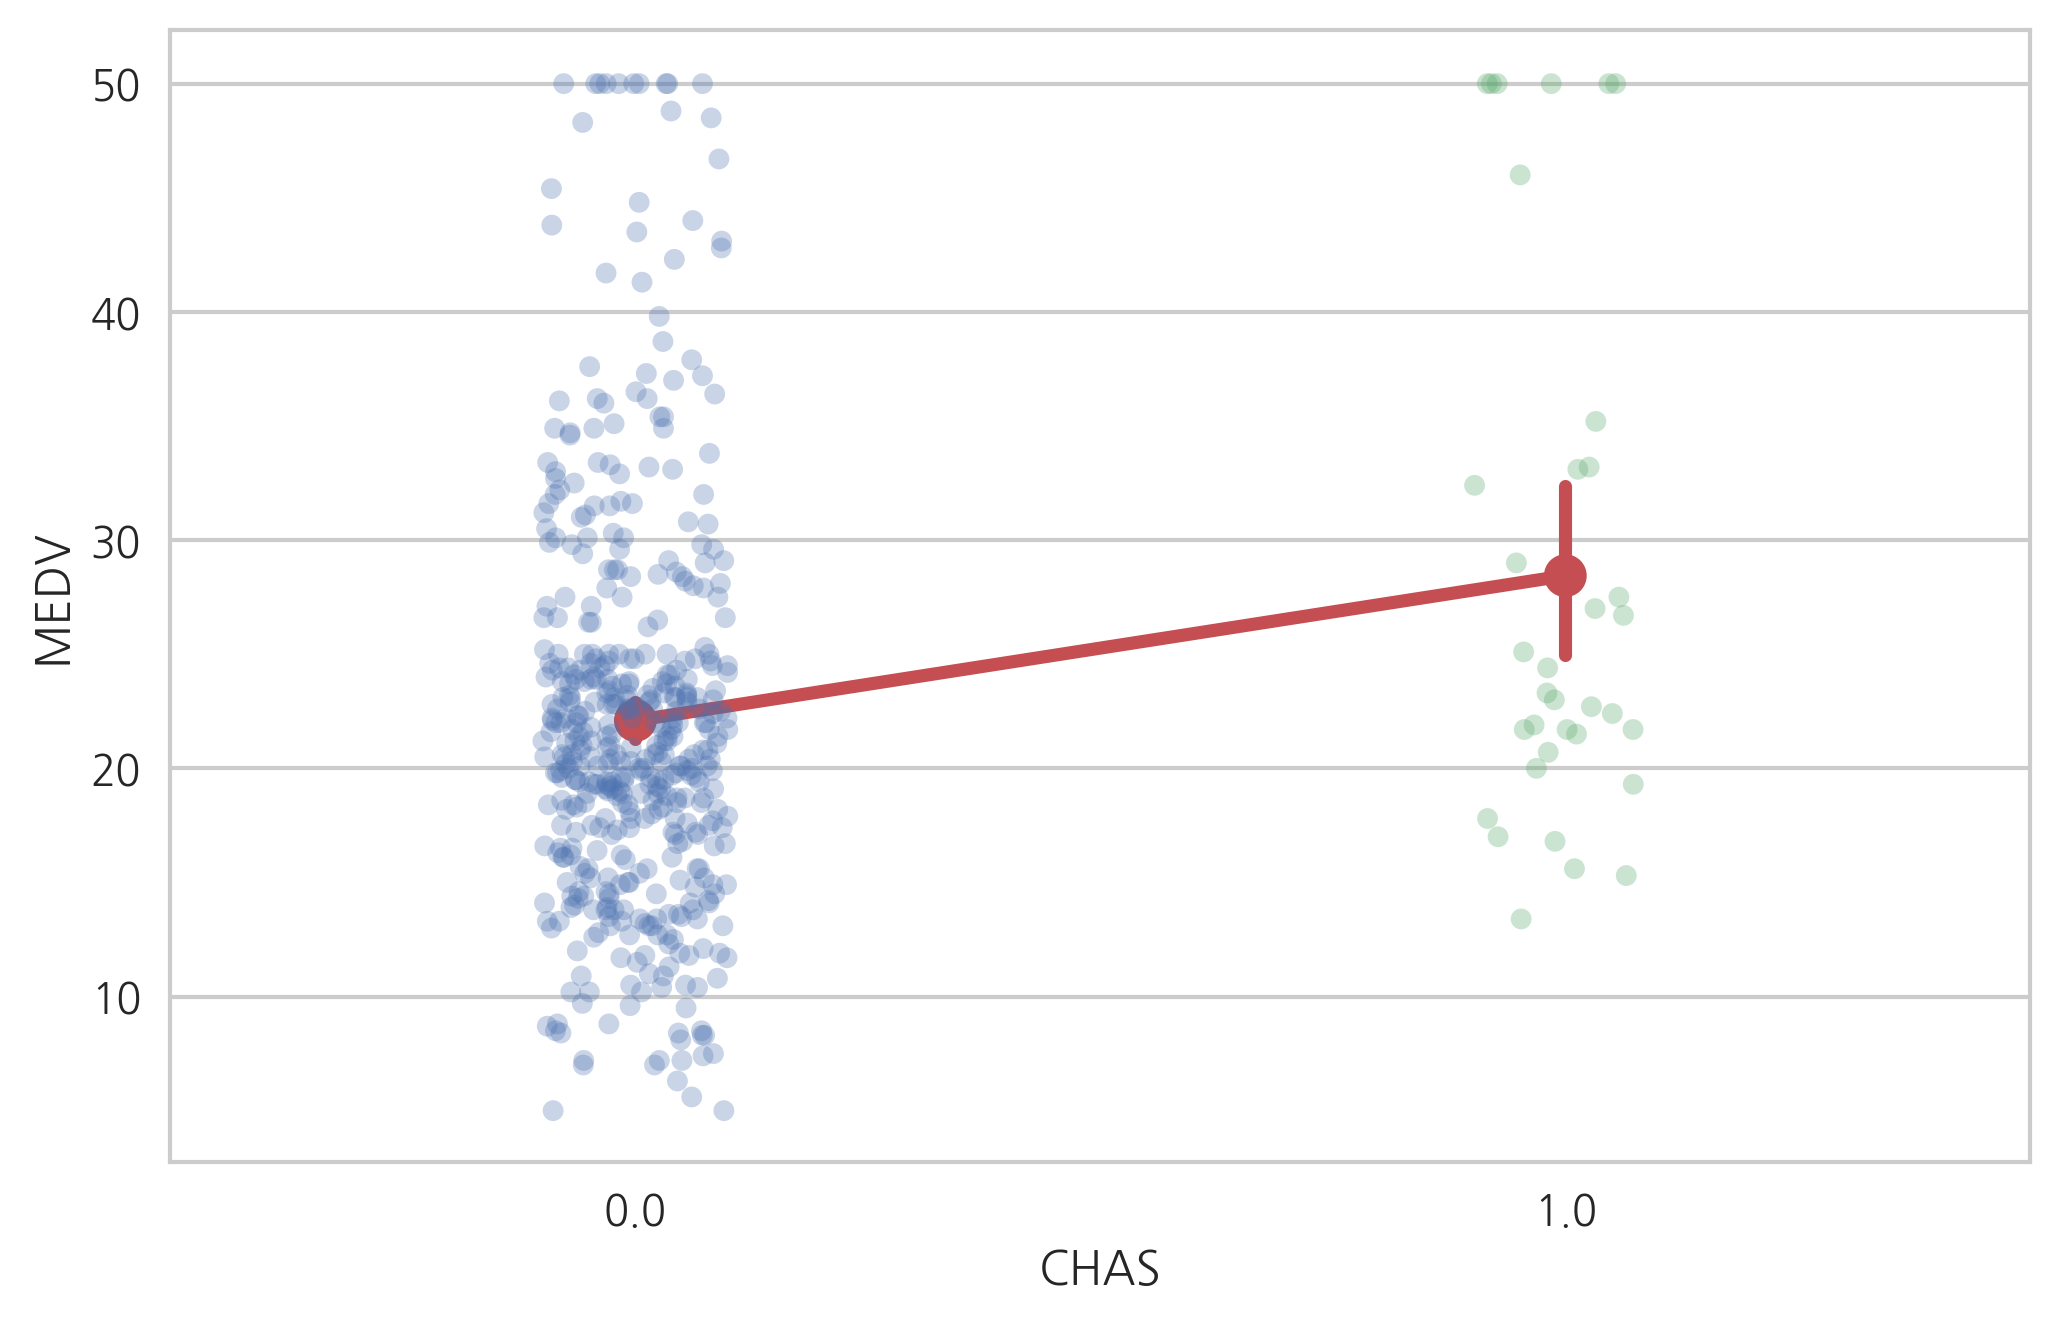

In [13]:
sns.stripplot(x="CHAS", y="MEDV", data=df_boston, jitter=True, alpha=.3)
sns.pointplot(x="CHAS", y="MEDV", data=df_boston, dodge=True, color='r')
plt.show()

In [17]:
model_chas = sm.OLS.from_formula("MEDV ~ C(CHAS) + 0", data=df_boston)
sm.stats.anova_lm(model_chas.fit())

/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/dockeruser/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(CHAS),2.0,258222.123856,129111.061928,1571.626788,2.495018e-217
Residual,504.0,41404.216144,82.151223,NaN,NaN
